## Импорты

In [2]:
import requests
from time import sleep
from tqdm import tqdm_notebook
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import pandas as pd

## Получим список районов

In [3]:
districts = ['Академический',
 'Алексеевский',
 'Алтуфьевский',
 'Арбат',
 'Аэропорт',
 'Бабушкинский',
 'Басманный',
 'Беговой',
 'Бескудниковский',
 'Бибирево',
 'Бирюлёво Восточное',
 'Бирюлёво Западное',
 'Богородское',
 'Братеево',
 'Бутырский',
 'Вешняки',
 'Внуково',
 'Войковский',
 'Восточное Дегунино',
 'Восточное Измайлово',
 'Восточный',
 'Выхино-Жулебино',
 'Гагаринский',
 'Головинский',
 'Гольяново',
 'Даниловский',
 'Дмитровский',
 'Донской',
 'Дорогомилово',
 'Замоскворечье',
 'Западное Дегунино',
 'Зюзино',
 'Зябликово',
 'Ивановское',
 'Измайлово',
 'Капотня',
 'Коньково',
 'Коптево',
 'Косино-Ухтомский',
 'Котловка',
 'Красносельский',
 'Крылатское',
 'Крюково',
 'Кузьминки',
 'Кунцево',
 'Куркино',
 'Левобережный',
 'Лефортово',
 'Лианозово',
 'Ломоносовский',
 'Лосиноостровский',
 'Люблино',
 'Марфино',
 'Марьина Роща',
 'Марьино',
 'Матушкино',
 'Метрогородок',
 'Мещанский',
 'Митино',
 'Можайский',
 'Молжаниновский',
 'Москворечье-Сабурово',
 'Нагатино-Садовники',
 'Нагатинский Затон',
 'Нагорный',
 'Некрасовка',
 'Нижегородский',
 'Новогиреево',
 'Новокосино',
 'Ново-Переделкино',
 'Обручевский',
 'Орехово-Борисово Северное',
 'Орехово-Борисово Южное',
 'Останкинский',
 'Отрадное',
 'Очаково-Матвеевское',
 'Перово',
 'Печатники',
 'Покровское-Стрешнево',
 'Преображенское',
 'Пресненский',
 'Проспект Вернадского',
 'Раменки',
 'Ростокино',
 'Рязанский',
 'Савёлки',
 'Савёловский',
 'Свиблово',
 'Северное Бутово',
 'Северное Измайлово',
 'Северное Медведково',
 'Северное Тушино',
 'Северный',
 'Силино',
 'Сокол',
 'Соколиная Гора',
 'Сокольники',
 'Солнцево',
 'Старое Крюково',
 'Строгино',
 'Таганский',
 'Тверской',
 'Текстильщики',
 'Тёплый Стан',
 'Тимирязевский',
 'Тропарёво-Никулино',
 'Филёвский Парк',
 'Фили-Давыдково',
 'Хамовники',
 'Ховрино',
 'Хорошёво-Мнёвники',
 'Хорошёвский',
 'Царицыно',
 'Черёмушки',
 'Чертаново Северное',
 'Чертаново Центральное',
 'Чертаново Южное',
 'Щукино',
 'Южное Бутово',
 'Южное Медведково',
 'Южное Тушино',
 'Южнопортовый',
 'Якиманка',
 'Ярославский',
 'Ясенево']

## Получим для каждого района координату

In [7]:
poly_dict = {}

for district in tqdm_notebook(districts):
    coords = requests.get(f'https://nominatim.openstreetmap.org/search?q=москва район {district}&format=json&polygon_geojson=1&addressdetails=1').json()
    type = coords[0]['class']
    
    if type == 'boundary':
        poly_dict[district] = coords[0]['geojson']['coordinates']
    else:
        print(f'Не найдено: {district}')
    sleep(1)

C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


Не найдено: Академический
Не найдено: Алексеевский
Не найдено: Бабушкинский
Не найдено: Басманный
Не найдено: Бескудниковский
Не найдено: Бутырский
Не найдено: Гагаринский
Не найдено: Головинский
Не найдено: Даниловский
Не найдено: Дмитровский
Не найдено: Донской
Не найдено: Красносельский
Не найдено: Ломоносовский
Не найдено: Лосиноостровский
Не найдено: Можайский
Не найдено: Нагорный
Не найдено: Нижегородский
Не найдено: Пресненский
Не найдено: Рязанский
Не найдено: Тверской
Не найдено: Тропарёво-Никулино
Не найдено: Ярославский



In [8]:
for district in tqdm_notebook(set(districts) - set(poly_dict.keys())):
    coords = requests.get(f'https://nominatim.openstreetmap.org/search?q=москва {district} район&format=json&polygon_geojson=1&addressdetails=1').json()
    if len(coords) == 0:
        continue
    
    type = coords[0]['class']
    
    if type == 'boundary':
        poly_dict[district] = coords[0]['geojson']['coordinates']
    else:
        print(f'Не найдено: {district}')
    sleep(1)

C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [6]:
poly_dict['Басманный'] = [[[37.6278676, 55.759523],
  [37.6279732, 55.759446],
  [37.6286241, 55.758999],
  [37.6286761, 55.7589613],
  [37.6288885, 55.7588201],
  [37.6289303, 55.7587911],
  [37.6292889, 55.7585266],
  [37.6294169, 55.7584351],
  [37.629715, 55.7582182],
  [37.6298059, 55.7581491],
  [37.6301168, 55.7579356],
  [37.6306618, 55.7576108],
  [37.6308925, 55.7575113],
  [37.6312037, 55.7573428],
  [37.6312802, 55.7573018],
  [37.6313619, 55.757255],
  [37.6314869, 55.7571629],
  [37.6316351, 55.7570484],
  [37.6316808, 55.7570123],
  [37.6318529, 55.7568761],
  [37.6320642, 55.756703],
  [37.6324445, 55.7563739],
  [37.6328276, 55.756095],
  [37.6329504, 55.7559984],
  [37.6332835, 55.7557363],
  [37.6335952, 55.7554836],
  [37.6339842, 55.7551657],
  [37.6340854, 55.7550788],
  [37.6341786, 55.7549866],
  [37.6342916, 55.7548619],
  [37.6344022, 55.7546948],
  [37.6345566, 55.7544688],
  [37.6345874, 55.7544236],
  [37.6346014, 55.754403],
  [37.6346594, 55.7543051],
  [37.6348807, 55.7539823],
  [37.6349153, 55.7539414],
  [37.6349593, 55.7539077],
  [37.6350118, 55.7538802],
  [37.6350699, 55.7538621],
  [37.6351622, 55.7538513],
  [37.6352315, 55.7538518],
  [37.6352868, 55.7538551],
  [37.6354676, 55.7538752],
  [37.635596, 55.7538922],
  [37.6356382, 55.7539003],
  [37.6367446, 55.7541538],
  [37.6369656, 55.7542043],
  [37.6371129, 55.7541383],
  [37.6374016, 55.7539166],
  [37.6377973, 55.7536243],
  [37.6379612, 55.7535453],
  [37.6387845, 55.7532871],
  [37.6389471, 55.7532362],
  [37.6395279, 55.753114],
  [37.6396988, 55.7530913],
  [37.6402386, 55.7530354],
  [37.6406082, 55.7529972],
  [37.6407018, 55.7529865],
  [37.6407839, 55.7529772],
  [37.6411667, 55.7529336],
  [37.6418219, 55.7528311],
  [37.642542, 55.7527133],
  [37.6426797, 55.7526907],
  [37.6428615, 55.7526599],
  [37.6430145, 55.7526555],
  [37.6442, 55.7527687],
  [37.6444354, 55.7527785],
  [37.6445521, 55.7527803],
  [37.6456091, 55.7528737],
  [37.646285, 55.7529302],
  [37.646665, 55.7529604],
  [37.6467331, 55.75297],
  [37.6468414, 55.7529891],
  [37.6469101, 55.7529996],
  [37.6470085, 55.7530147],
  [37.6471531, 55.7530256],
  [37.6474145, 55.7530407],
  [37.6474749, 55.7530423],
  [37.6475653, 55.7530451],
  [37.6475981, 55.7530447],
  [37.6477259, 55.753043],
  [37.6481498, 55.7530207],
  [37.6486896, 55.7529874],
  [37.648914, 55.7529797],
  [37.6490324, 55.7529756],
  [37.6492678, 55.752977],
  [37.6493354, 55.7529815],
  [37.6495062, 55.7529927],
  [37.6497432, 55.7530205],
  [37.6500415, 55.7530627],
  [37.6500706, 55.7530668],
  [37.6502542, 55.7530948],
  [37.6504556, 55.7531256],
  [37.6508261, 55.7531881],
  [37.6508743, 55.7531981],
  [37.6521282, 55.7534596],
  [37.6523123, 55.7535001],
  [37.6524824, 55.7535428],
  [37.6526227, 55.7535802],
  [37.6528613, 55.753657],
  [37.6530579, 55.7537304],
  [37.6531279, 55.7537561],
  [37.6534947, 55.7539101],
  [37.6538474, 55.7540835],
  [37.6540708, 55.7542148],
  [37.6540918, 55.7542272],
  [37.6542356, 55.7543147],
  [37.6543418, 55.754368],
  [37.6543532, 55.7543737],
  [37.6544519, 55.7544092],
  [37.6547798, 55.7544904],
  [37.6548078, 55.7544961],
  [37.6549914, 55.7545337],
  [37.6551319, 55.7545596],
  [37.6551459, 55.7545621],
  [37.6558416, 55.7546891],
  [37.6559063, 55.7546995],
  [37.6564048, 55.7547533],
  [37.6568654, 55.7547304],
  [37.6576159, 55.7547685],
  [37.6582756, 55.7547261],
  [37.6591884, 55.7546447],
  [37.6605079, 55.754504],
  [37.6610217, 55.7544727],
  [37.6616406, 55.7543814],
  [37.6624374, 55.7542424],
  [37.6626992, 55.7541815],
  [37.6629251, 55.7540965],
  [37.6630817, 55.7540217],
  [37.6632338, 55.7539232],
  [37.6633315, 55.7538417],
  [37.6635401, 55.7536007],
  [37.6637647, 55.7532918],
  [37.6638736, 55.7531403],
  [37.6640931, 55.7528365],
  [37.6641523, 55.7527575],
  [37.6641919, 55.7527353],
  [37.6642473, 55.7527208],
  [37.6643509, 55.7527313],
  [37.6644138, 55.7527348],
  [37.6645592, 55.752757],
  [37.6647812, 55.7528036],
  [37.6649986, 55.752849],
  [37.6657854, 55.7530328],
  [37.6658961, 55.7530457],
  [37.6662121, 55.7531496],
  [37.6675558, 55.7521931],
  [37.6680232, 55.7518768],
  [37.668539, 55.751587],
  [37.6691636, 55.7512902],
  [37.669784, 55.7509997],
  [37.6705308, 55.7507488],
  [37.6710752, 55.7511538],
  [37.6718522, 55.7518008],
  [37.6725497, 55.7523878],
  [37.6730203, 55.7531707],
  [37.6730467, 55.7536944],
  [37.672941, 55.7540014],
  [37.6727058, 55.7544162],
  [37.6724875, 55.7547417],
  [37.6722576, 55.7550845],
  [37.6716849, 55.7561162],
  [37.6713575, 55.7566258],
  [37.6707562, 55.7579228],
  [37.6709609, 55.758348],
  [37.6713312, 55.7586762],
  [37.6723001, 55.7591627],
  [37.6730154, 55.7593289],
  [37.6739117, 55.7593699],
  [37.675127, 55.7593111],
  [37.6764911, 55.7592015],
  [37.679468, 55.7590578],
  [37.6802155, 55.7590725],
  [37.680948, 55.7591418],
  [37.6818025, 55.7593123],
  [37.682588, 55.7595356],
  [37.6841593, 55.7602741],
  [37.6853903, 55.7615256],
  [37.6860083, 55.7622016],
  [37.6857508, 55.7635538],
  [37.6858452, 55.7639835],
  [37.6861199, 55.7643119],
  [37.6872872, 55.7657026],
  [37.6884389, 55.7671317],
  [37.6890397, 55.7677739],
  [37.6903786, 55.7684836],
  [37.6921989, 55.7694899],
  [37.6923411, 55.7694097],
  [37.6923818, 55.7693849],
  [37.692454, 55.7693582],
  [37.6926365, 55.7692861],
  [37.693027, 55.769099],
  [37.694085, 55.7684693],
  [37.6968795, 55.766892],
  [37.6969201, 55.7668751],
  [37.6970297, 55.7668304],
  [37.6970687, 55.7668136],
  [37.6972212, 55.7667953],
  [37.6973026, 55.7667933],
  [37.6973756, 55.7668022],
  [37.6974476, 55.766819],
  [37.6975025, 55.7668408],
  [37.6979331, 55.7671332],
  [37.6979777, 55.7671609],
  [37.6987364, 55.7676323],
  [37.6988894, 55.7677327],
  [37.698948, 55.7677708],
  [37.6991905, 55.7679217],
  [37.6993742, 55.7680416],
  [37.7003574, 55.7686994],
  [37.700994, 55.7690925],
  [37.7017986, 55.7695893],
  [37.7025185, 55.770029],
  [37.7027714, 55.7701328],
  [37.7030932, 55.7702444],
  [37.7034741, 55.7703712],
  [37.7038014, 55.7704617],
  [37.7039462, 55.7704979],
  [37.7043485, 55.7706065],
  [37.7046489, 55.7707272],
  [37.7047259, 55.7707746],
  [37.7048206, 55.7708329],
  [37.7051478, 55.7710984],
  [37.7052894, 55.7711876],
  [37.705416, 55.7712674],
  [37.7056843, 55.7714122],
  [37.7066069, 55.7718407],
  [37.7073729, 55.7722196],
  [37.707638, 55.772339],
  [37.708335, 55.7726858],
  [37.7089719, 55.7730028],
  [37.7095516, 55.7732912],
  [37.7096495, 55.7733399],
  [37.7097327, 55.7733813],
  [37.7098662, 55.7734477],
  [37.710089, 55.773566],
  [37.7102438, 55.773638],
  [37.7103354, 55.7736842],
  [37.7104472, 55.7737405],
  [37.7110554, 55.7740645],
  [37.7118155, 55.7744125],
  [37.7125056, 55.7747637],
  [37.7129132, 55.774976],
  [37.713174, 55.7750994],
  [37.7135195, 55.7752661],
  [37.7133277, 55.7754793],
  [37.7126807, 55.7761712],
  [37.7109312, 55.7780007],
  [37.71043, 55.7784492],
  [37.7099197, 55.7788745],
  [37.7093365, 55.7792845],
  [37.7087898, 55.7796227],
  [37.7082977, 55.7799071],
  [37.7077419, 55.7801608],
  [37.7071268, 55.7803837],
  [37.7060926, 55.7807372],
  [37.7052497, 55.7809935],
  [37.7044914, 55.7811858],
  [37.704302, 55.7812394],
  [37.7031812, 55.7815238],
  [37.7025297, 55.7816545],
  [37.7018967, 55.7817704],
  [37.7012436, 55.7818505],
  [37.7006114, 55.7818911],
  [37.6999826, 55.7819119],
  [37.6999012, 55.7819144],
  [37.6995778, 55.7819687],
  [37.6994135, 55.7819706],
  [37.6992491, 55.7819725],
  [37.6968642, 55.7820403],
  [37.6963373, 55.7820152],
  [37.6947382, 55.7820062],
  [37.6939971, 55.782002],
  [37.692549, 55.78199],
  [37.6925588, 55.781899],
  [37.6907692, 55.7818568],
  [37.6888219, 55.781905],
  [37.6870549, 55.7818477],
  [37.6865388, 55.781815],
  [37.684818, 55.7815966],
  [37.684842, 55.7808113],
  [37.6833491, 55.7797033],
  [37.6824486, 55.7790349],
  [37.6805195, 55.7775436],
  [37.6804607, 55.7774855],
  [37.6804393, 55.7774393],
  [37.6804317, 55.7774156],
  [37.680401, 55.7773197],
  [37.6802746, 55.7772325],
  [37.6801088, 55.777118],
  [37.679164, 55.7773184],
  [37.6790611, 55.7773459],
  [37.6785947, 55.7775151],
  [37.6775268, 55.7779024],
  [37.676381, 55.7783179],
  [37.6761926, 55.7783726],
  [37.6761173, 55.7783944],
  [37.676015, 55.7784025],
  [37.6758868, 55.7783862],
  [37.6756764, 55.7782765],
  [37.6755247, 55.7781891],
  [37.675383, 55.7781153],
  [37.6747866, 55.7777925],
  [37.6746413, 55.7777126],
  [37.6744626, 55.7776212],
  [37.6743666, 55.7775723],
  [37.6740614, 55.7774248],
  [37.673944, 55.7773566],
  [37.6737434, 55.7772511],
  [37.6735845, 55.7771642],
  [37.6735132, 55.7771252],
  [37.6734153, 55.7770718],
  [37.6731545, 55.7769443],
  [37.67305, 55.7768974],
  [37.672884, 55.7768231],
  [37.6725892, 55.7766924],
  [37.6722668, 55.7765495],
  [37.6719292, 55.7763999],
  [37.6715511, 55.7762324],
  [37.6711025, 55.7760358],
  [37.6709121, 55.7759588],
  [37.6707924, 55.775906],
  [37.6706146, 55.7758194],
  [37.6701613, 55.7756004],
  [37.6696879, 55.7753716],
  [37.6680497, 55.7745648],
  [37.667872, 55.7745042],
  [37.6663255, 55.7739771],
  [37.6644401, 55.77334],
  [37.664325, 55.7732475],
  [37.6642951, 55.7731648],
  [37.6641293, 55.7726874],
  [37.6640474, 55.772459],
  [37.6639789, 55.7722454],
  [37.6639259, 55.7721631],
  [37.6638703, 55.7720925],
  [37.6637724, 55.7718196],
  [37.6636877, 55.7715897],
  [37.6636548, 55.7715004],
  [37.6634556, 55.7709669],
  [37.6634398, 55.7709247],
  [37.6634273, 55.7708912],
  [37.6633776, 55.7707529],
  [37.6632534, 55.7704203],
  [37.6632521, 55.7704169],
  [37.6630987, 55.7699949],
  [37.6630272, 55.7697983],
  [37.6630021, 55.7697318],
  [37.6628521, 55.7697325],
  [37.6618243, 55.7697262],
  [37.6613555, 55.7697258],
  [37.6611867, 55.7697243],
  [37.6608302, 55.7697213],
  [37.6593897, 55.7696957],
  [37.6592162, 55.7696926],
  [37.65915, 55.7696913],
  [37.6589779, 55.7696879],
  [37.6588696, 55.7696857],
  [37.6582335, 55.7696726],
  [37.6579255, 55.7696664],
  [37.657317, 55.7696539],
  [37.6570905, 55.7696493],
  [37.6567813, 55.7696423],
  [37.6558992, 55.7696212],
  [37.6556718, 55.7696158],
  [37.6556269, 55.7696147],
  [37.6552746, 55.7696063],
  [37.6547878, 55.7695985],
  [37.654742, 55.7695967],
  [37.6545617, 55.7695896],
  [37.6544715, 55.7695848],
  [37.6541497, 55.7695592],
  [37.653871, 55.7695244],
  [37.6535723, 55.7694802],
  [37.6532797, 55.7694399],
  [37.6530829, 55.7694111],
  [37.6529545, 55.7693877],
  [37.6527039, 55.7693367],
  [37.6524614, 55.7692868],
  [37.6519001, 55.7691639],
  [37.6515263, 55.7690835],
  [37.6513134, 55.7690377],
  [37.6506615, 55.7688916],
  [37.6505374, 55.7688776],
  [37.6503937, 55.7688764],
  [37.6502953, 55.768875],
  [37.6502216, 55.7688659],
  [37.6501277, 55.7688456],
  [37.6499957, 55.7687935],
  [37.649674, 55.7687315],
  [37.6481493, 55.7685552],
  [37.6481174, 55.768577],
  [37.6480721, 55.7685976],
  [37.647998, 55.7686072],
  [37.6479109, 55.7686079],
  [37.6458824, 55.7684978],
  [37.6457003, 55.7684859],
  [37.6455754, 55.7684778],
  [37.6454811, 55.7684659],
  [37.6449487, 55.7684949],
  [37.6446849, 55.7684584],
  [37.6444696, 55.7683416],
  [37.6442548, 55.7682351],
  [37.6439597, 55.7680963],
  [37.6438059, 55.7680282],
  [37.6434107, 55.76785],
  [37.6433198, 55.767809],
  [37.643191, 55.7677543],
  [37.6428716, 55.7676277],
  [37.642812, 55.7676047],
  [37.642706, 55.767564],
  [37.642541, 55.7675007],
  [37.6420898, 55.767326],
  [37.6416809, 55.7671574],
  [37.6415119, 55.7670825],
  [37.6410731, 55.7668698],
  [37.6409637, 55.7668169],
  [37.6408659, 55.7667702],
  [37.6404961, 55.7665775],
  [37.6401153, 55.7663786],
  [37.6399009, 55.7662625],
  [37.6396307, 55.7661237],
  [37.6394867, 55.7660498],
  [37.6389802, 55.76579],
  [37.6386771, 55.7656345],
  [37.6385451, 55.7655695],
  [37.6382689, 55.7654318],
  [37.63817, 55.7654013],
  [37.6381113, 55.765384],
  [37.6380237, 55.7653701],
  [37.6374571, 55.7651911],
  [37.6373343, 55.7651529],
  [37.6372925, 55.7651344],
  [37.6371906, 55.7650633],
  [37.6369059, 55.7647923],
  [37.6366637, 55.7645194],
  [37.6365892, 55.764434],
  [37.6361758, 55.7639831],
  [37.636157, 55.7639626],
  [37.6360918, 55.7638934],
  [37.6356291, 55.7634155],
  [37.6353337, 55.7631306],
  [37.6351438, 55.7629409],
  [37.634677, 55.7625305],
  [37.6346316, 55.7624963],
  [37.6345899, 55.7624612],
  [37.634475, 55.7623831],
  [37.6342499, 55.7622468],
  [37.6337475, 55.7619682],
  [37.6333253, 55.7617406],
  [37.6333141, 55.7617345],
  [37.6329345, 55.761529],
  [37.6321956, 55.7611008],
  [37.6321149, 55.7610539],
  [37.6319939, 55.7609604],
  [37.6319349, 55.7609037],
  [37.6317133, 55.7606758],
  [37.6316745, 55.7606357],
  [37.631595, 55.7605612],
  [37.6315143, 55.7604971],
  [37.6313737, 55.7603766],
  [37.6313264, 55.7603355],
  [37.6312132, 55.760257],
  [37.6311203, 55.760214],
  [37.6309767, 55.7601687],
  [37.6308448, 55.760131],
  [37.6306806, 55.7600951],
  [37.6299554, 55.75998],
  [37.6295856, 55.7599306],
  [37.6287622, 55.759819],
  [37.6286483, 55.759794],
  [37.628472, 55.7597524],
  [37.628263, 55.7596993],
  [37.6281067, 55.7596427],
  [37.628018, 55.7596088],
  [37.6278676, 55.759523]]]

NameError: name 'poly_dict' is not defined

In [16]:
def get_district(lat, lon):
    point = Point(lat, lon)
    
    for district, coords in poly_dict.items():
        polygon = Polygon(coords[0])
        if polygon.contains(point):
            return district
    return None

In [14]:
for district in ['Внуково', 'Восточный', 'Кунцево']:
    del poly_dict[district]

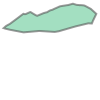

In [17]:
Polygon(poly_dict['Марьино'][0])

In [19]:
pd.to_pickle(poly_dict, 'district_boundaries.pickle')